In [1]:
# !pip install h2o

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 1 min
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_kiran_rxcg9r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.764 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_AutoML_20210718_094210


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2606959077493633: 


,,false,true,Error,Rate
0,false,344.0,14.0,0.0391,(14.0/358.0)
1,true,3.0,30.0,0.0909,(3.0/33.0)
2,Total,347.0,44.0,0.0435,(17.0/391.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

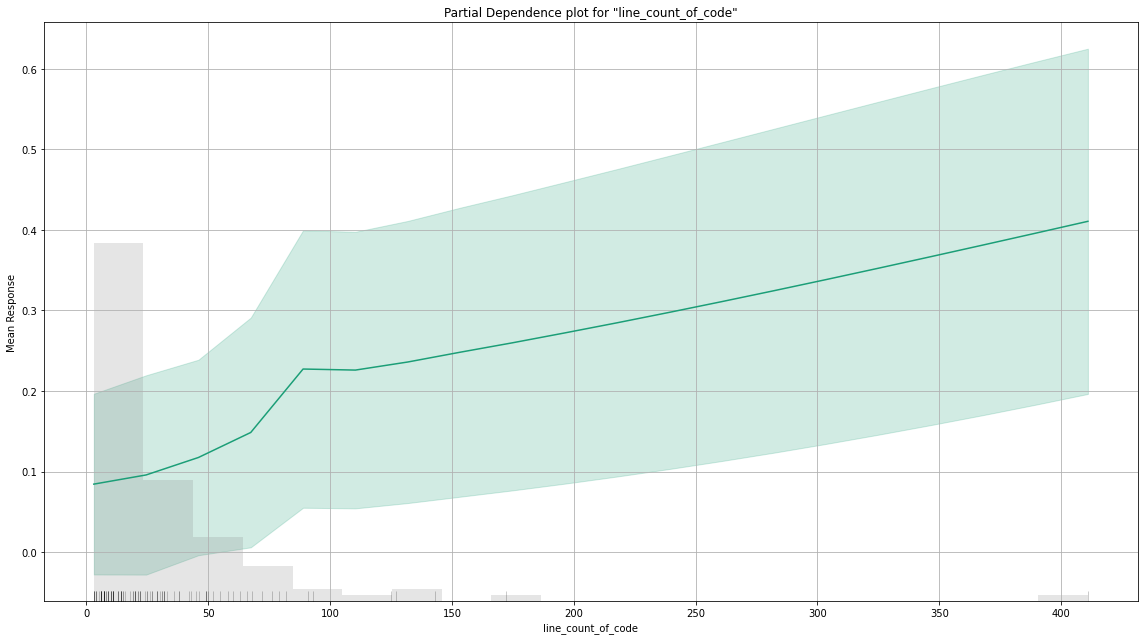

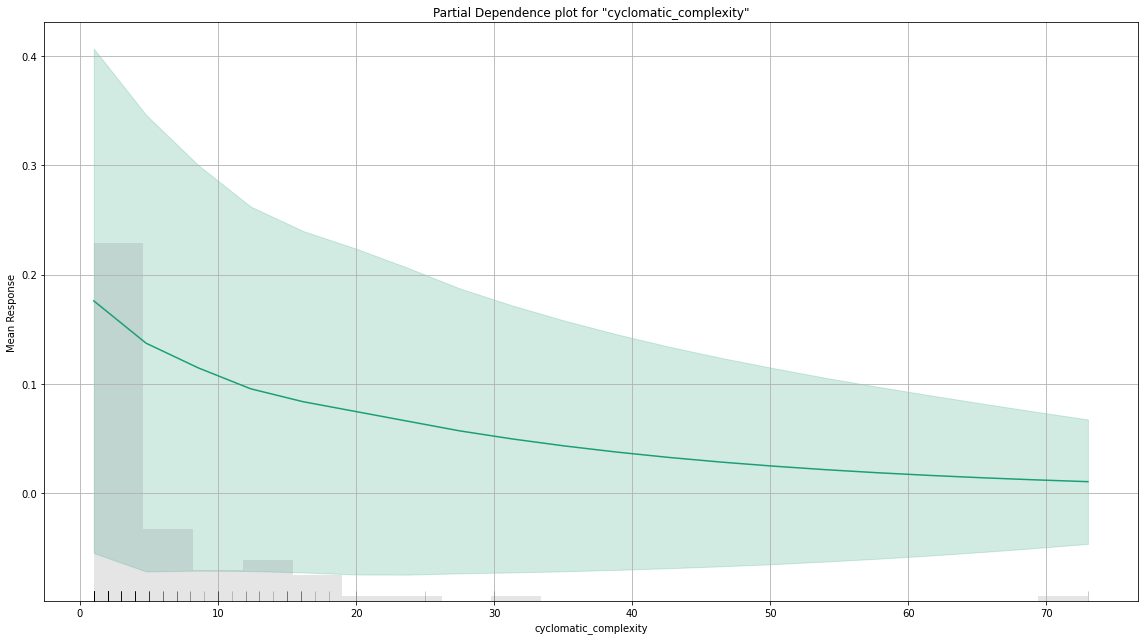

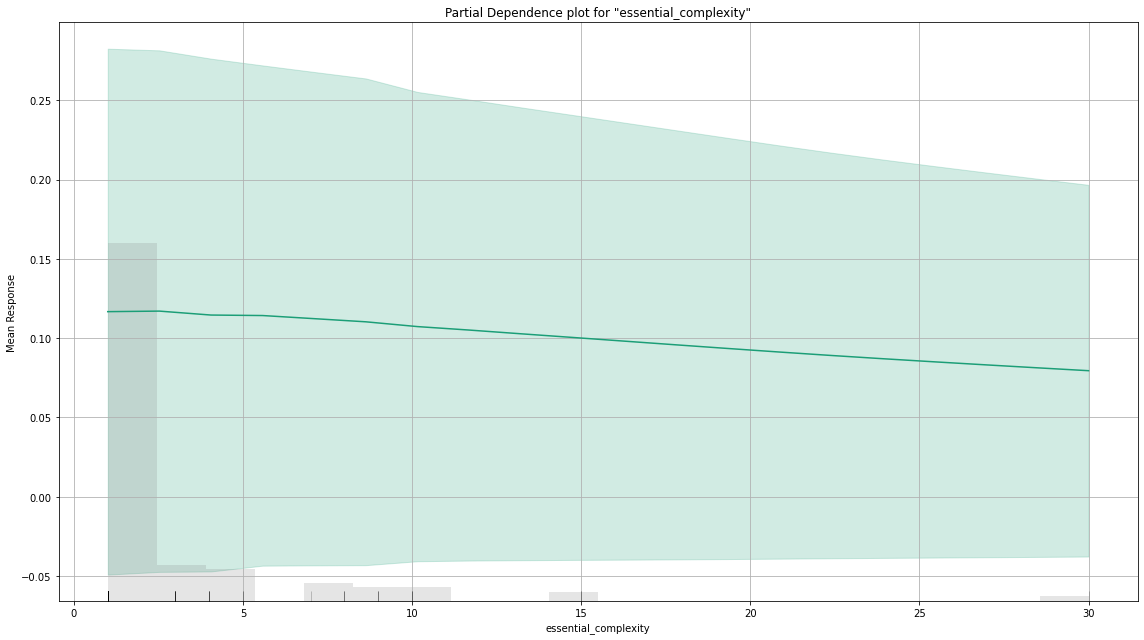

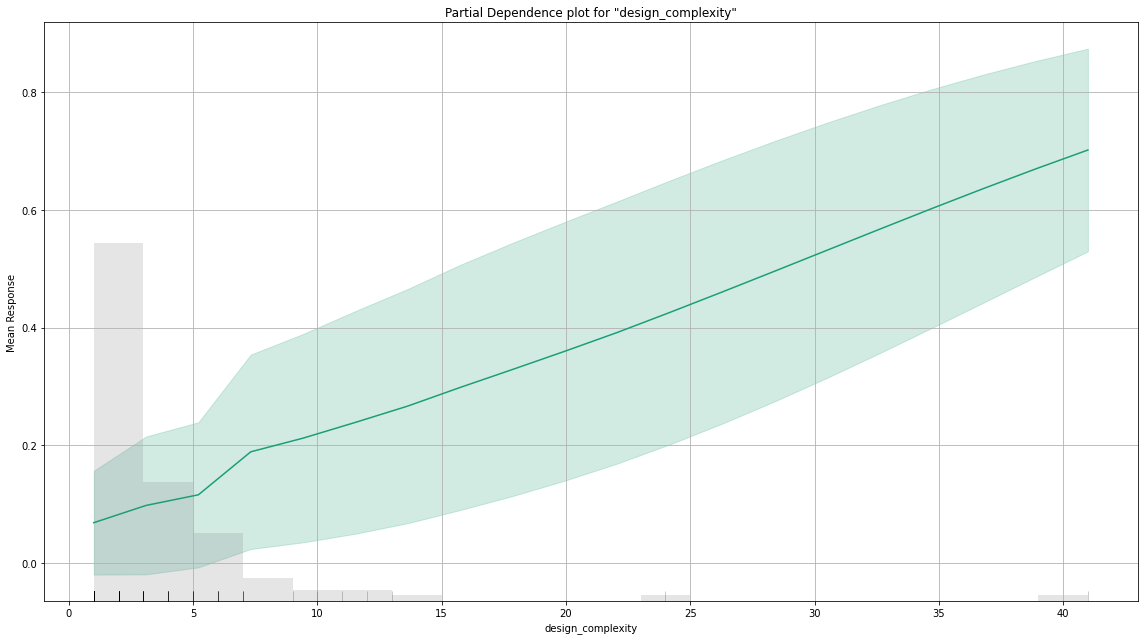

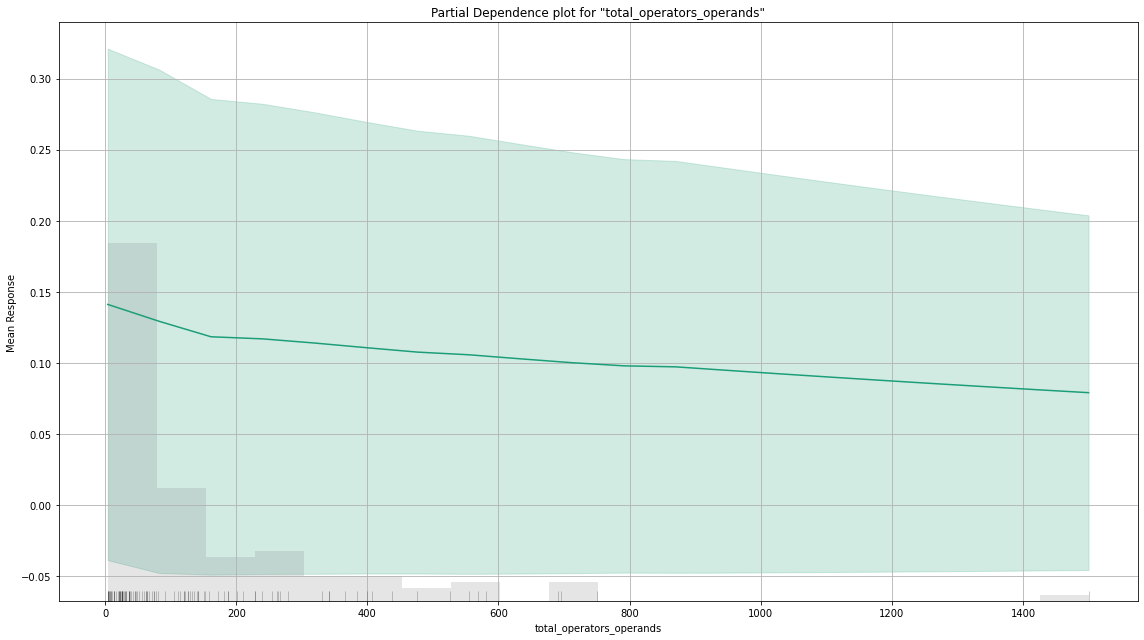

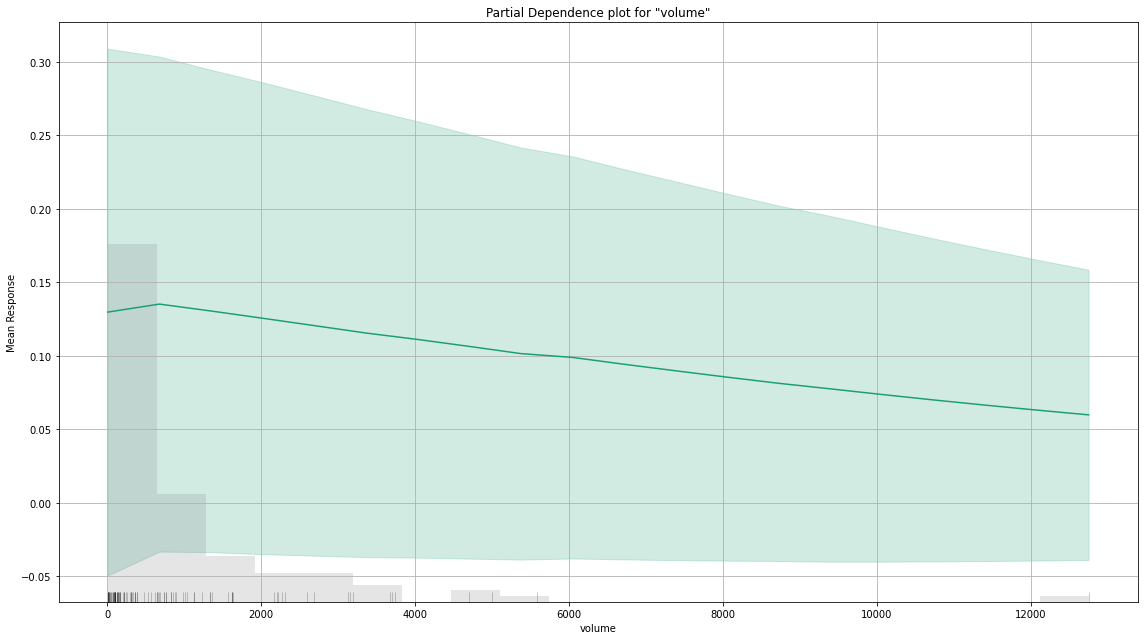

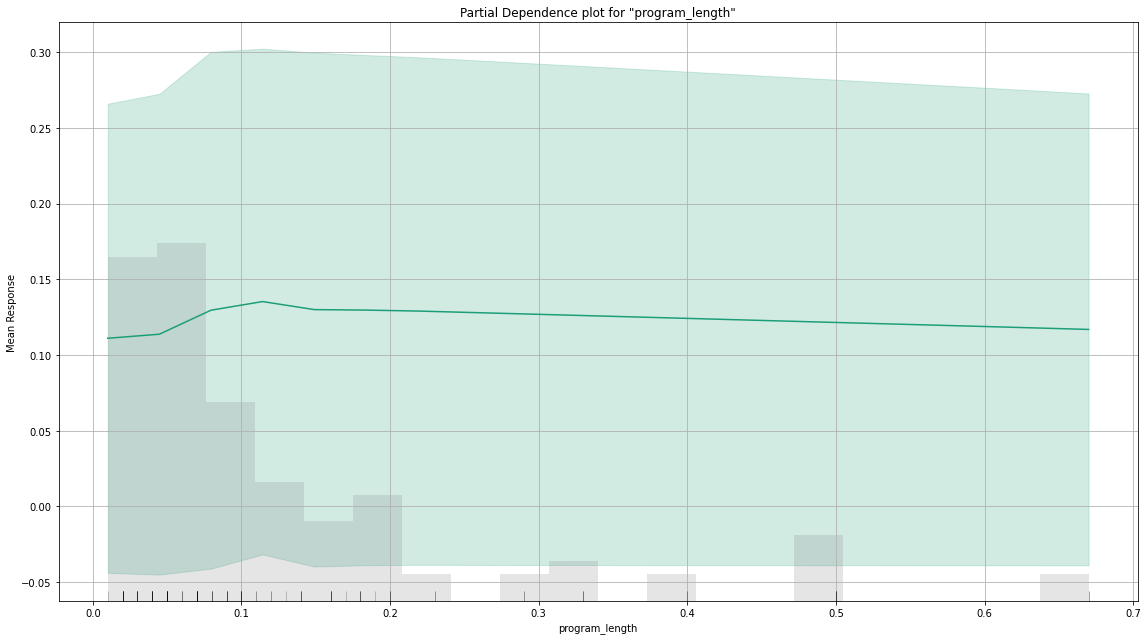

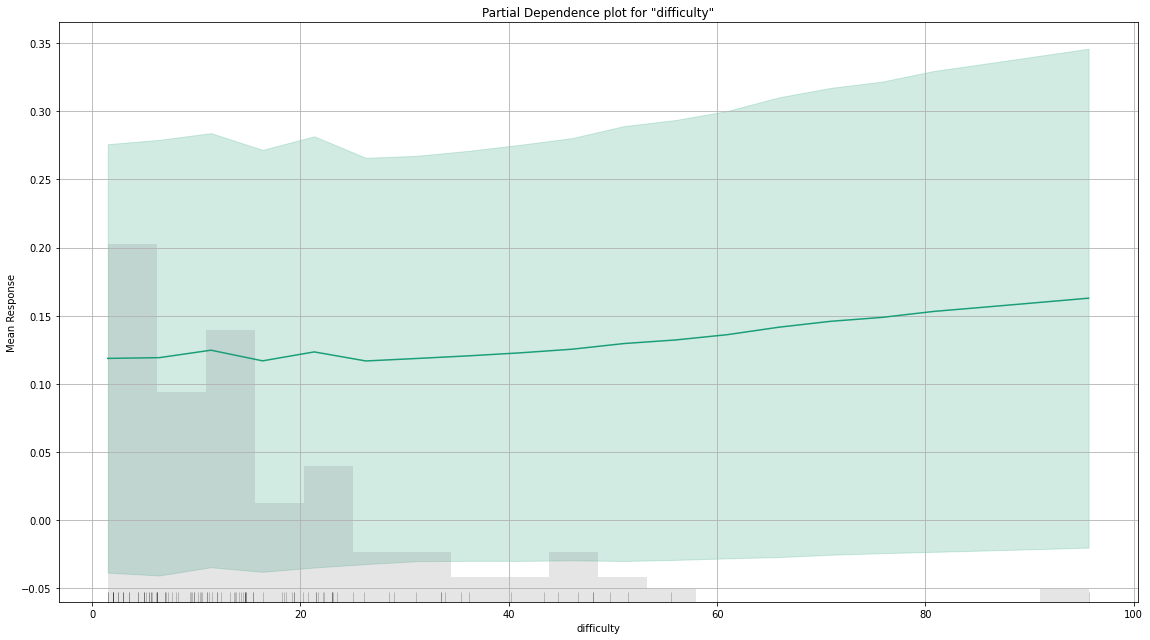

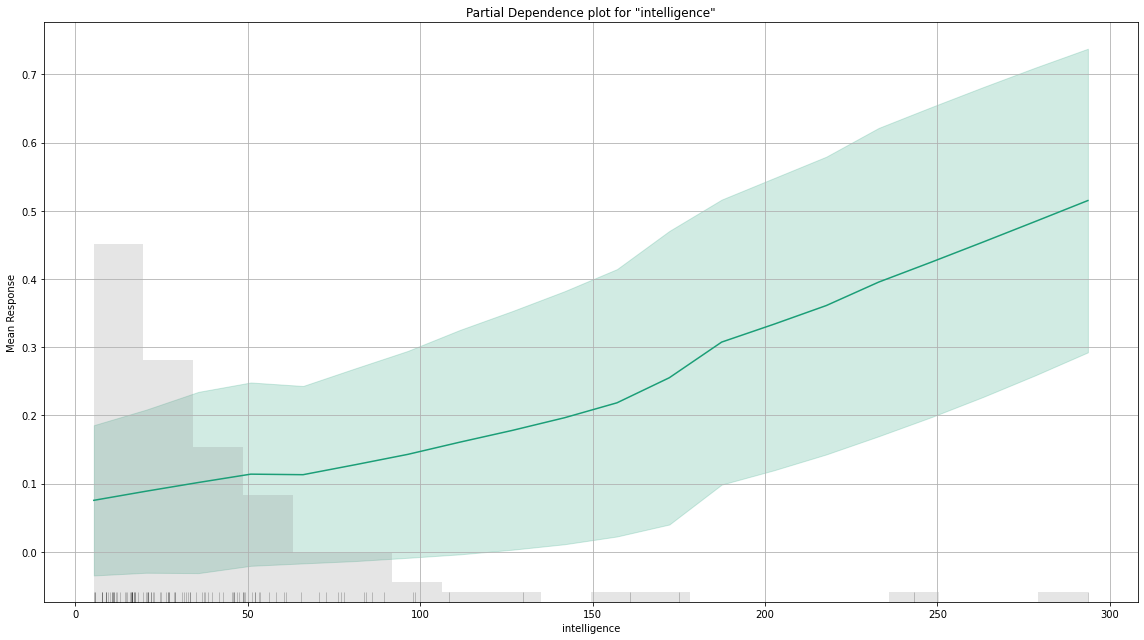

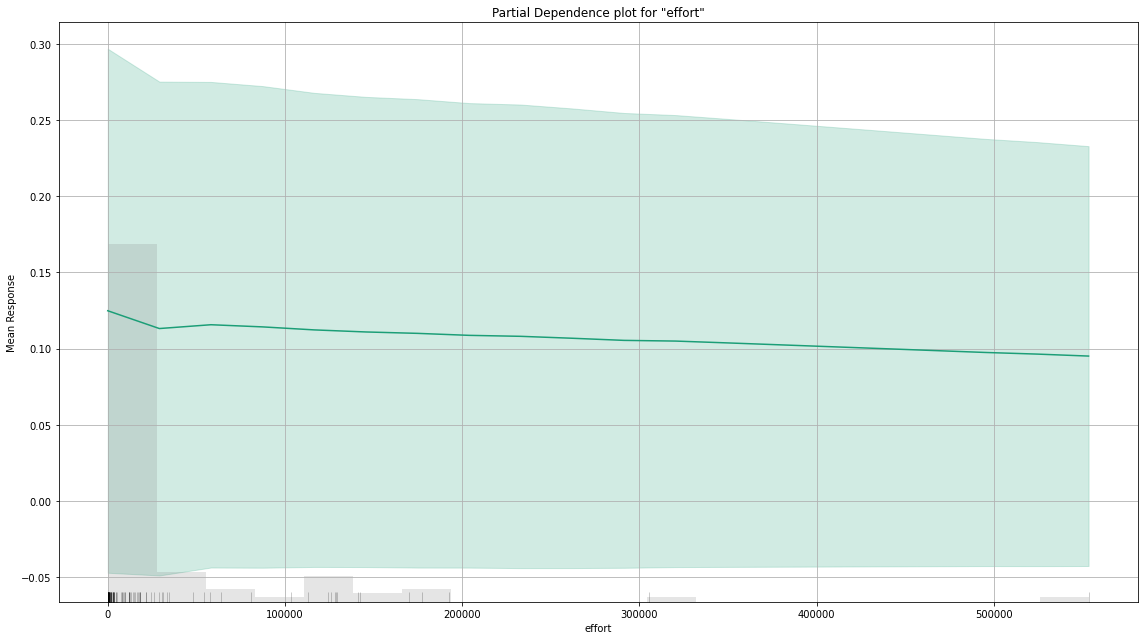

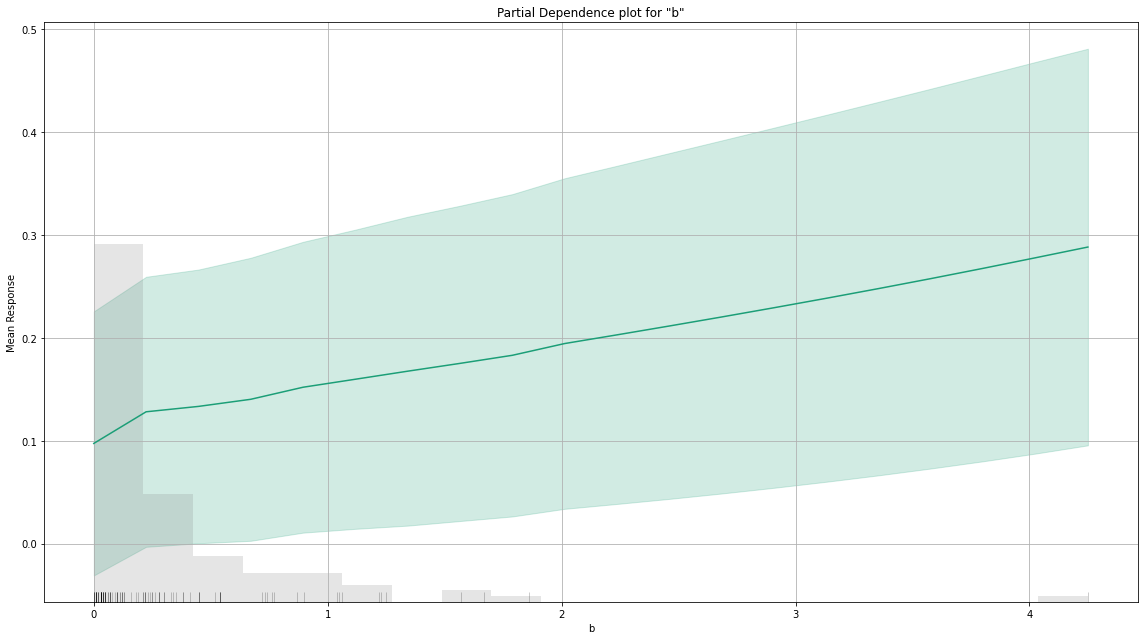

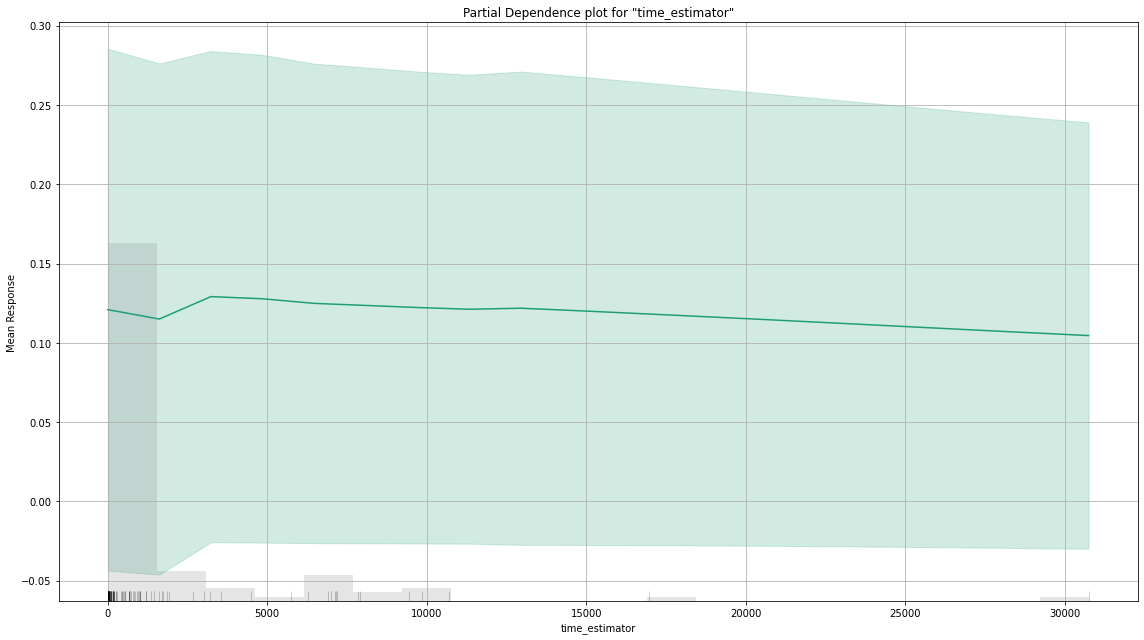

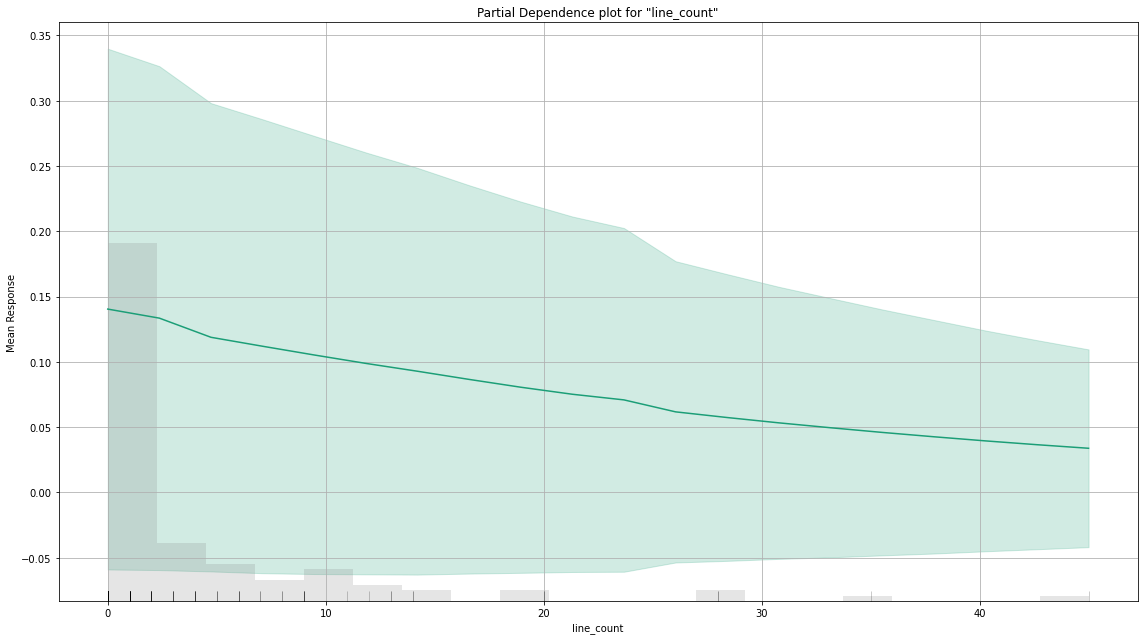

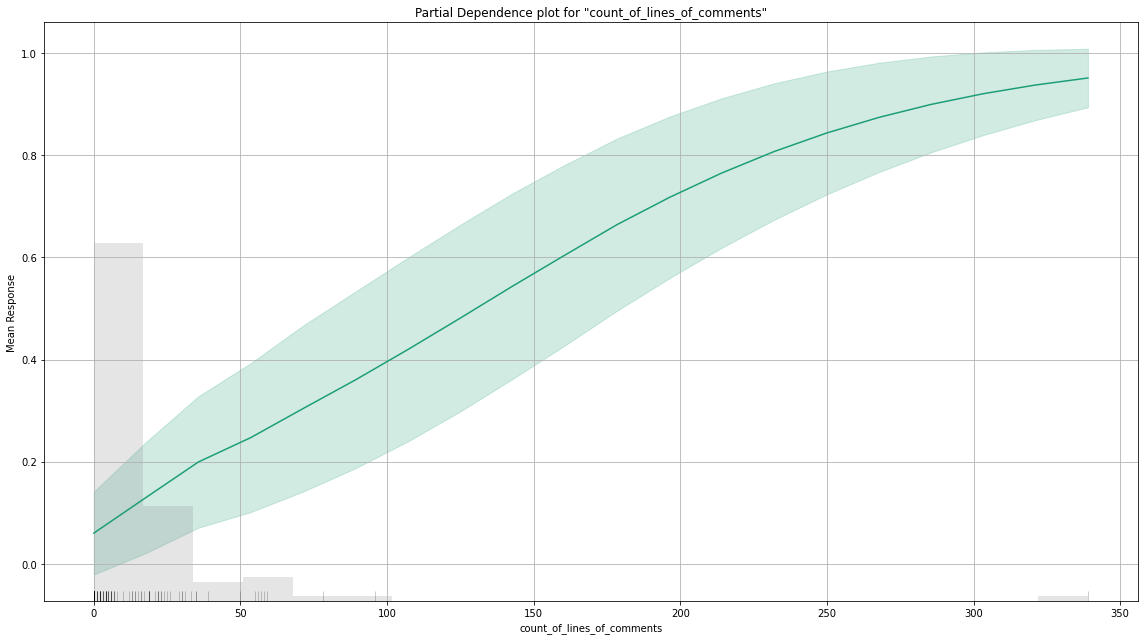

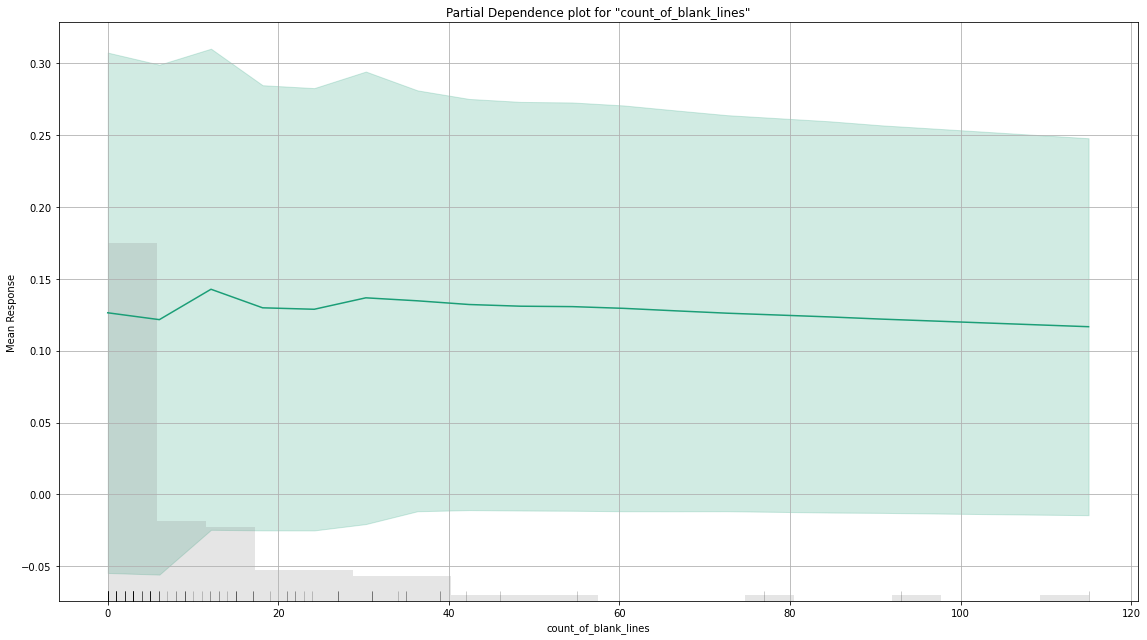

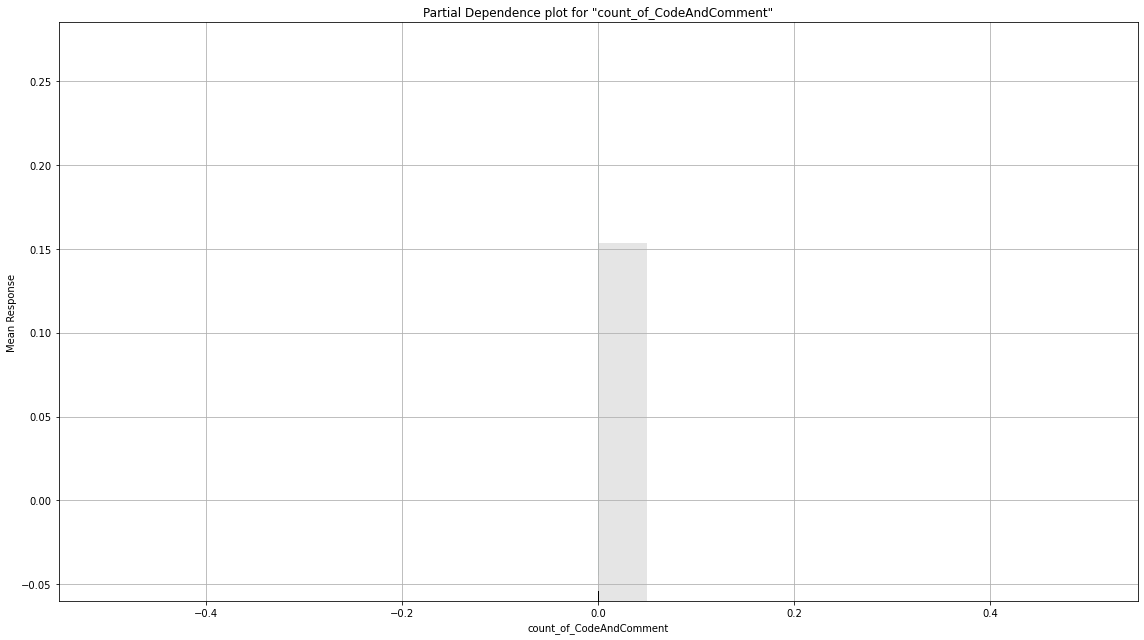

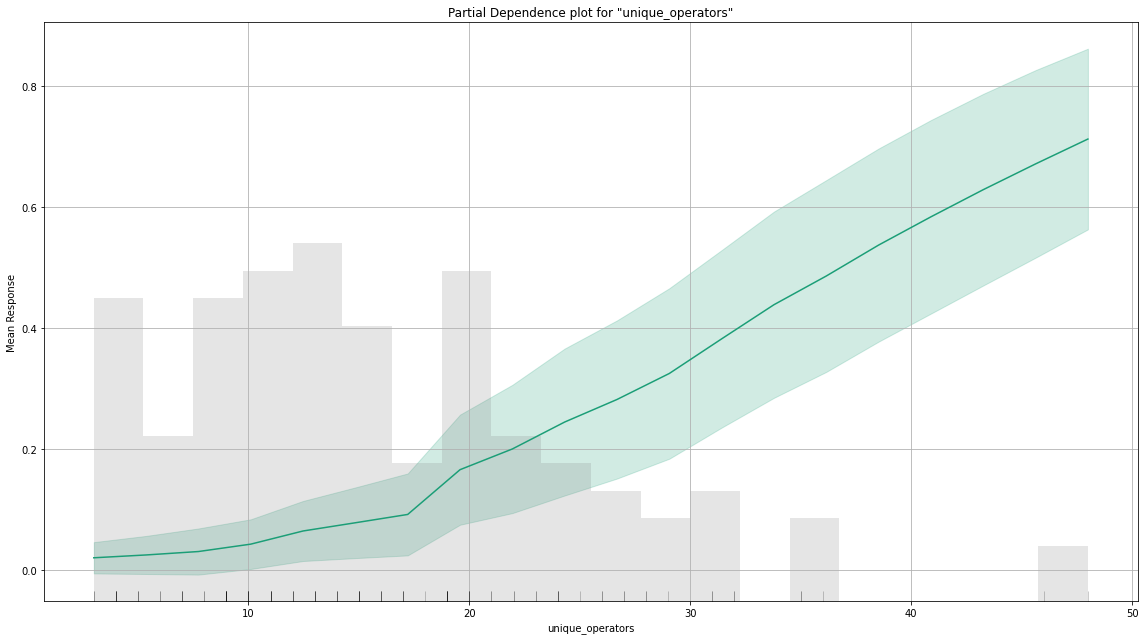

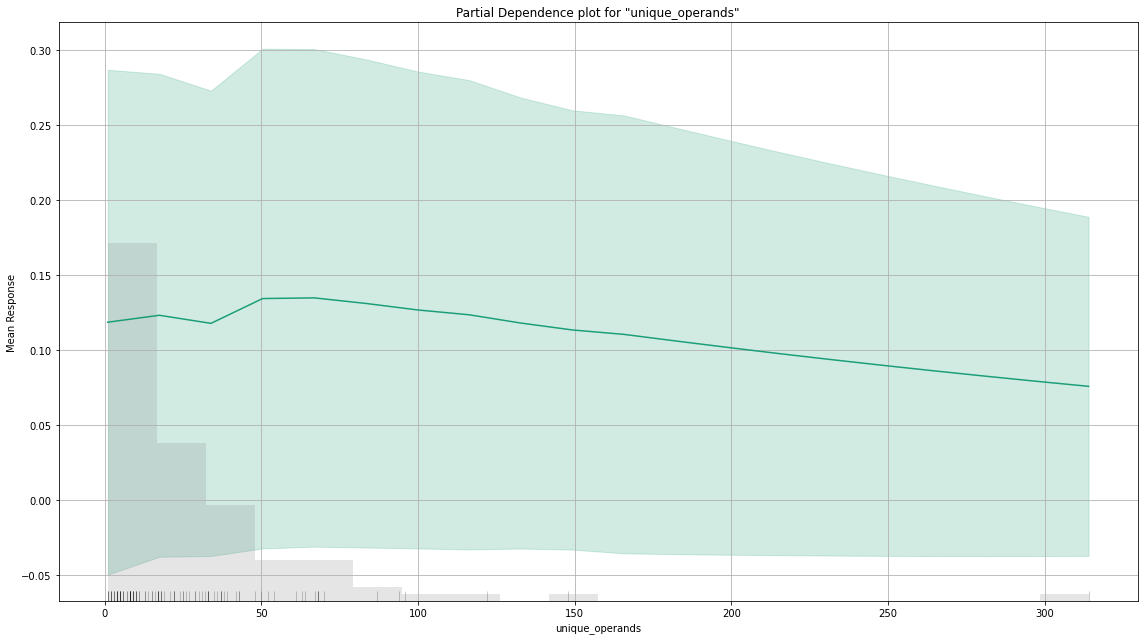

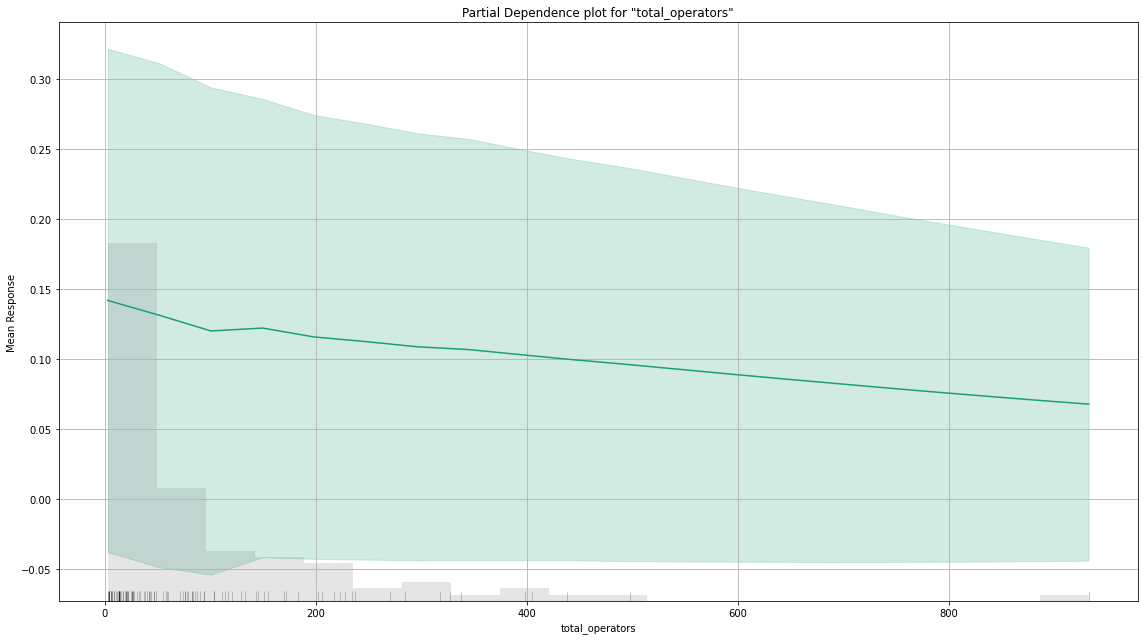

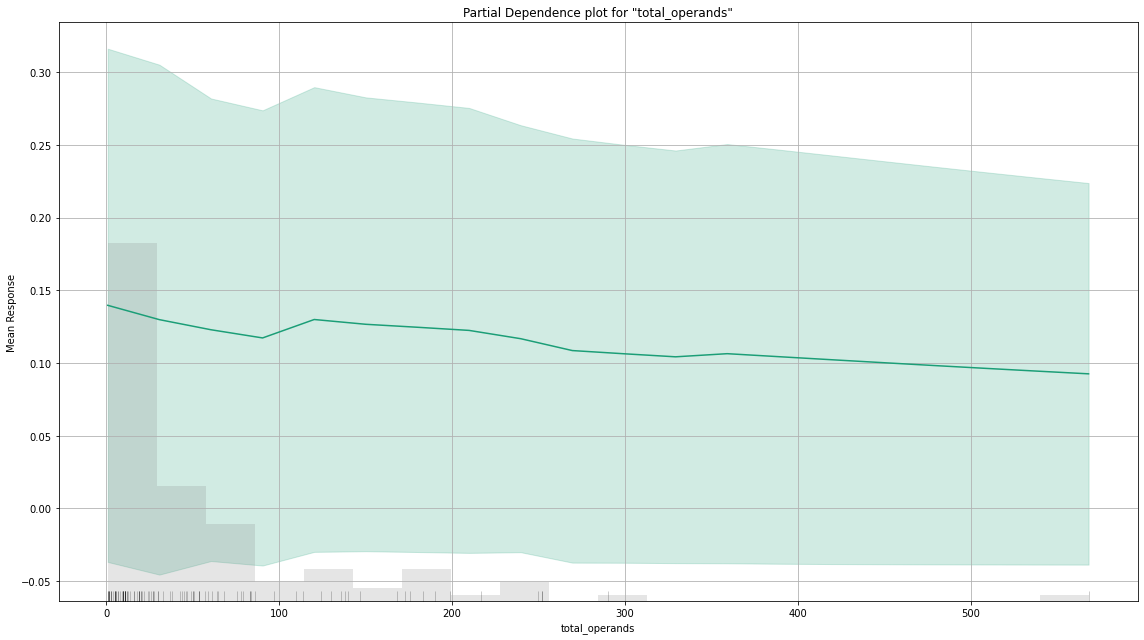

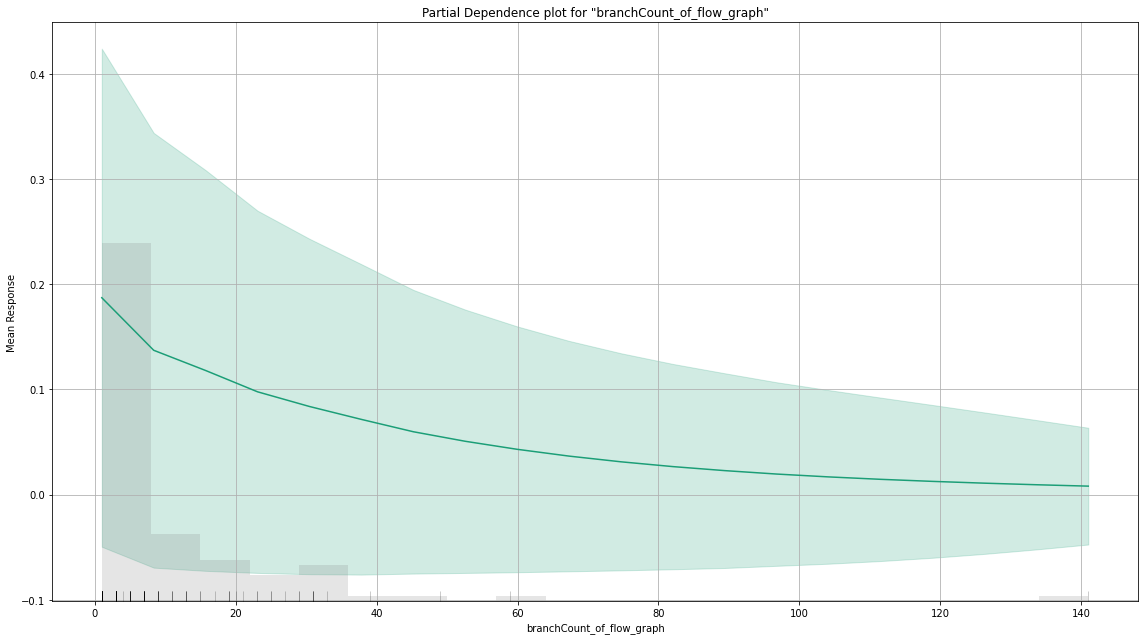

In [2]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import wine quality dataset
f = "bug_pred.csv"
df = h2o.import_file(f)

# Reponse column
y = "defects"

# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

# Explain leader model & compare with all AutoML models
# exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)

# Explain a generic list of models
# use h2o.explain as follows:
# exl = h2o.explain(model_list, test)

exm = aml.leader.explain(test)


#       1. loc             : numeric % McCabe's line count of code
#       2. v(g)            : numeric % McCabe "cyclomatic complexity"
#       3. ev(g)           : numeric % McCabe "essential complexity"
#       4. iv(g)           : numeric % McCabe "design complexity"
#       5. n               : numeric % Halstead total operators + operands
#       6. v               : numeric % Halstead "volume"
#       7. l               : numeric % Halstead "program length"
#       8. d               : numeric % Halstead "difficulty"
#       9. i               : numeric % Halstead "intelligence"
#      10. e               : numeric % Halstead "effort"
#      11. b               : numeric % Halstead 
#      12. t               : numeric % Halstead's time estimator
#      13. lOCode          : numeric % Halstead's line count
#      14. lOComment       : numeric % Halstead's count of lines of comments
#      15. lOBlank         : numeric % Halstead's count of blank lines
#      16. lOCodeAndComment: numeric
#      17. uniq_Op         : numeric % unique operators
#      18. uniq_Opnd       : numeric % unique operands
#      19. total_Op        : numeric % total operators
#      20. total_Opnd      : numeric % total operands
#      21: branchCount     : numeric % of the flow graph
#      22. defects         : {false,true} % module has/has not one or more 
#                                         % reported defects
